# One-Dimensional Kalman Filter - Static Systems
In this example we'll apply the Kalman filter equations to estimate (like in the previous case) the distance between a radar sensor and an object fixed in space.
For each available measurement, the Kalman filter iterates across two phases:

•	the <i>prediction</i> phase implements equations that describe the physical model of our system: from the current state (and its uncertainty) we can then predict which will be the next one (and the relevant uncertainty);

•	the <i>correction</i> (or <i>update</i>) phase uses the new measurements to apply the needed correction to the predicted epoch state according with the confidence level we have (measurement uncertainty).

Note that we here define the uncertainties $ {p} $ and $ {r} $ as the square of the standard deviation. This value is also called <i>variance</i>. For this specific example it is just a scalar number, but for multi-dimensional state estimation it becomes a matrix whose elements are called <i>covariance</i>.


### The dynamic model equations (prediction)
The way in which the system evolves over time is modeled by using a couple of equations, one describing the state evolution over time and the other one quantifying the relevant uncertainty. In our case, since the object under observation is static, the equations are:

### $$ \hat{x}_{n,n-1}= \hat{x}_{n-1,n-1} $$
### $$ p_{n,n-1}= p_{n-1,n-1} $$

where

$ \hat{x}_{n,n-1} $ is the estimated value of the state at time <i>n</i> before taking the measurement $ {y}_{n} $ 

$ \hat{x}_{n-1,n-1} $ is the estimated value of the state at time <i>n-1</i> after taking the measurement $ {y}_{n-1}  $

$ p_{n,n-1} $ is the estimated value of the state uncertainty at time <i>n</i> before taking the measurement $ {y}_{n} $ 

$ p_{n-1,n-1} $ is the estimated value of the state uncertainty at time <i>n-1</i> after taking the measurement $ {y}_{n-1}  $

The first equation just says that the the predicted position at next step is the same as the the previous one (the object is stationary), while the second assumes that the predicted  estimate uncertainty is equal to the current estimate uncertainty (assuming the constant position model).

### The state update equation (correction)
Those equations describe how the estimates of the state and  its uncerainty at time <i>n</i> change when considering the measurement ${y}_{n}$. $K_{n}$ is called <i>Kalman gain</i> and, differently from the previous case (when the multiplying factor was just $ \frac{1}{n}$), its value is calculated at each iteration and spans between 0 and 1.

### $$ \hat{x}_{n,n}= \hat{x}_{n,n-1}+ K_{n}\left( y_{n}- \hat{x}_{n,n-1} \right) $$

### $$ p_{n,n}=~  \left( 1-K_{n} \right) p_{n,n-1} $$

where:

$ {y}_{n}  $ is the value of the <i>n</i>th measurement

$ \hat{x}_{n,n-1} $ is the estimated value of the state at time <i>n</i> before taking the measurement $ {y}_{n} $

$ \hat{x}_{n,n} $ is the estimated value of the state at time <i>n</i> after taking the measurement $ {y}_{n}  $

When $K_{n} = 1$ then $\hat{x}_{n,n} = {y}_{n} $, meaning that the state update just takes the measurement (the dynamic model is not taken into account). When $K_{n} = 0$ then $\hat{x}_{n,n} = \hat{x}_{n,n-1}$, meaning that the state estimate only relies on the dynamic model equation

### The Kalman gain equation
This equation returns the value of the Kalman gain for each measuremnt $ {y}_{n} $

### $$ K_{n}= \frac{p_{n,n-1}}{p_{n,n-1}+r_{n}} $$

where:

$ {p}_{n,n-1} $ is the uncertainty of the state estimate at time <i>n</i> 

$ {r}_{n} $ is the uncertainty relevant to measure  $ {y}_{n} $

When the measurement uncertainty is very large respect to the state estimate uncertainty, the Kalman Gain is close to zero. Hence we give a big weight to the estimate and a small weight to the measurement. On the other side, when the measurement uncertainty is very small compared to the state estimate uncertainty, the Kalman Gain is close to one. Hence we give a small weight to the estimate and a big weight to the measurement. If the measurement uncertainty is equal to the state estimate uncertainty, then the Kalman gain equals to 0.5.




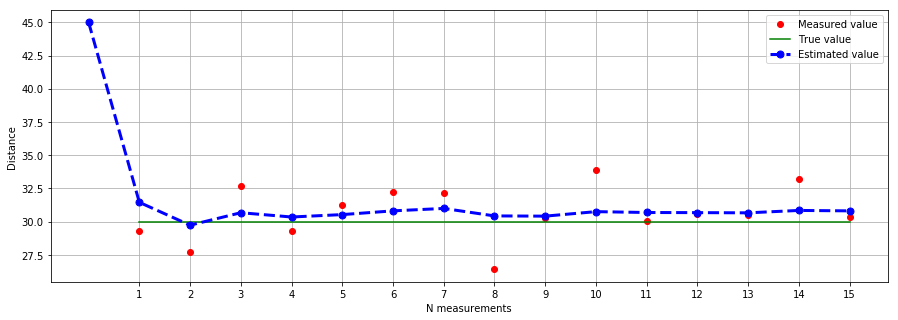

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

######## input data ###########
trueDistance = 30 # meters
initialEstimation = 45 # meters
initialUncertainty = 5 # meters - 1-sigma uncertainty of the estimate

nMeasurements = 15
measUncertainty = 2 # meters - 1-sigma uncertainty of the measuring device

#########################################

####### initialization 
estimates = np.empty(nMeasurements + 1)
estimates[0] = initialEstimation

uncertainties = np.empty(nMeasurements + 1)
uncertainties[0] = initialUncertainty

kalmanGains = np.empty(nMeasurements)
nIndex = 1;

measurements = trueDistance + measUncertainty * np.random.randn(nMeasurements) # measurements
p = initialUncertainty * initialUncertainty # initial variance for the state
r = measUncertainty * measUncertainty # variance of the measuring device
state = initialEstimation

for y in measurements:
    ### update ###
    kalmanGain = p / (p + r)
    state = state + kalmanGain * (y - state)
    p = (1-kalmanGain) * p
    
    ### predict ###
    state = state # the object isn't moving, so there is no update
    p = p # same for the variance
    
    estimates[nIndex] = state
    kalmanGains[nIndex - 1] = kalmanGain
    uncertainties[nIndex] = math.sqrt(p)
    nIndex = nIndex + 1
    
    
x = np.full(nMeasurements, trueDistance)

plt.plot(np.arange(1, nMeasurements+1, 1.0), measurements, 'ro', label='Measured value')
plt.plot(np.arange(1, nMeasurements+1, 1.0), x, color='green', label='True value')
plt.plot(np.arange(0, nMeasurements+1, 1.0), estimates, color='blue', linewidth=3, label='Estimated value', linestyle='--', marker='o', markersize=7)

plt.xlabel('N measurements')
plt.ylabel('Distance')
plt.xticks(np.arange(1, nMeasurements+1, 1.0))
plt.grid(True)
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)

While the number of measurements grows, the estimated value converges to the true one. Here the convergence is much faster than the one happening in the previous example.
We can see how the uncertainties related to the state estimates decrease over time. The more the number of measurements, the smaller is the uncertainty:

We can rewrite the state update equation as:

### $$ \hat{x}_{n,n}=~ \hat{x}_{n,n-1}+ K_{n} \left( y_{n}- \hat{x}_{n,n-1} \right) = \left( 1-K_{n} \right) \hat{x}_{n,n-1}+ K_{n}y_{n} $$

As you can see the Kalman Gain $ K_{n} $ is the weight that we give to the measurement. And $ 1 - K_{n} $ is the weight that we give to the estimate.

Measure after measure, the filter decreases the uncertainty in the state estimate (p decreases) and the Kalman gain decreases as well. After a certain amount of processed measurement, the state uncertainty is so small that the filter believes that the state is very well known and no update are necessary. The filter become <i>smug</i> in this case

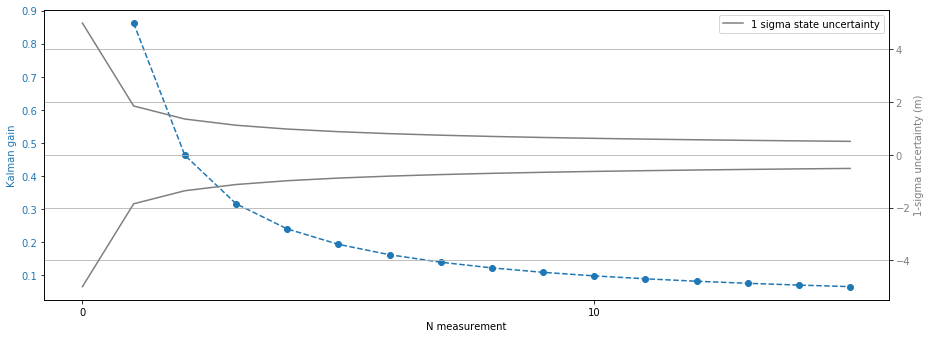

In [27]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('N measurement')
ax1.set_ylabel('Kalman gain', color=color)
ax1.plot(np.arange(1, nMeasurements+1, 1.0), kalmanGains, '--o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('1-sigma uncertainty (m)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(0, nMeasurements+1, 1.0), np.array(uncertainties), color=color, label = '1 sigma state uncertainty')
ax2.plot(np.arange(0, nMeasurements+1, 1.0), -np.array(uncertainties), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(15,5)
plt.xticks(np.arange(0, nMeasurements+1, 10))
plt.grid(True)
leg = plt.legend()
plt.show()